<a href="https://colab.research.google.com/github/salzzyy/COMPUTER-VISION/blob/main/HaarCascade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Haar Cascade                    
Haar Cascade is a machine learning-based object detection algorithm used for detecting faces, eyes, and other objects in an image. It was introduced by Paul Viola and Michael Jones in 2001.
   

### How Haar Cascade Works
**Haar Features:**

* The algorithm uses black & white rectangular features (similar to edge detection).
* Example: A face has a dark eye region and a bright forehead.

**Integral Image:**

* A fast mathematical technique to compute feature sums quickly.

**Adaboost Training:**

* Selects the most important Haar features to improve detection.
Reduces computation by focusing on key areas of an image.

**Cascade Classifier:**

* A multi-stage process where easy-to-detect regions are quickly eliminated.
Complex regions go through multiple stages of refinement.


### Why Use Haar Cascade?
* ✔Fast & Lightweight → Runs in real-time.
* ✔ Works well on frontal faces & eyes.
* ✔ Pre-trained models available in OpenC



## Common Haar Cascade Files in OpenCV

* Face Detection: haarcascade_frontalface_default.xml
* Eye Detection: haarcascade_eye.xml
* Profile Face Detection (Side Face): haarcascade_profileface.xml
* Full Body Detection: haarcascade_fullbody.xml



In [133]:
import cv2

In [134]:
image = cv2.imread('/content/sample.jpg')

In [135]:
image.shape

(1280, 1920, 3)

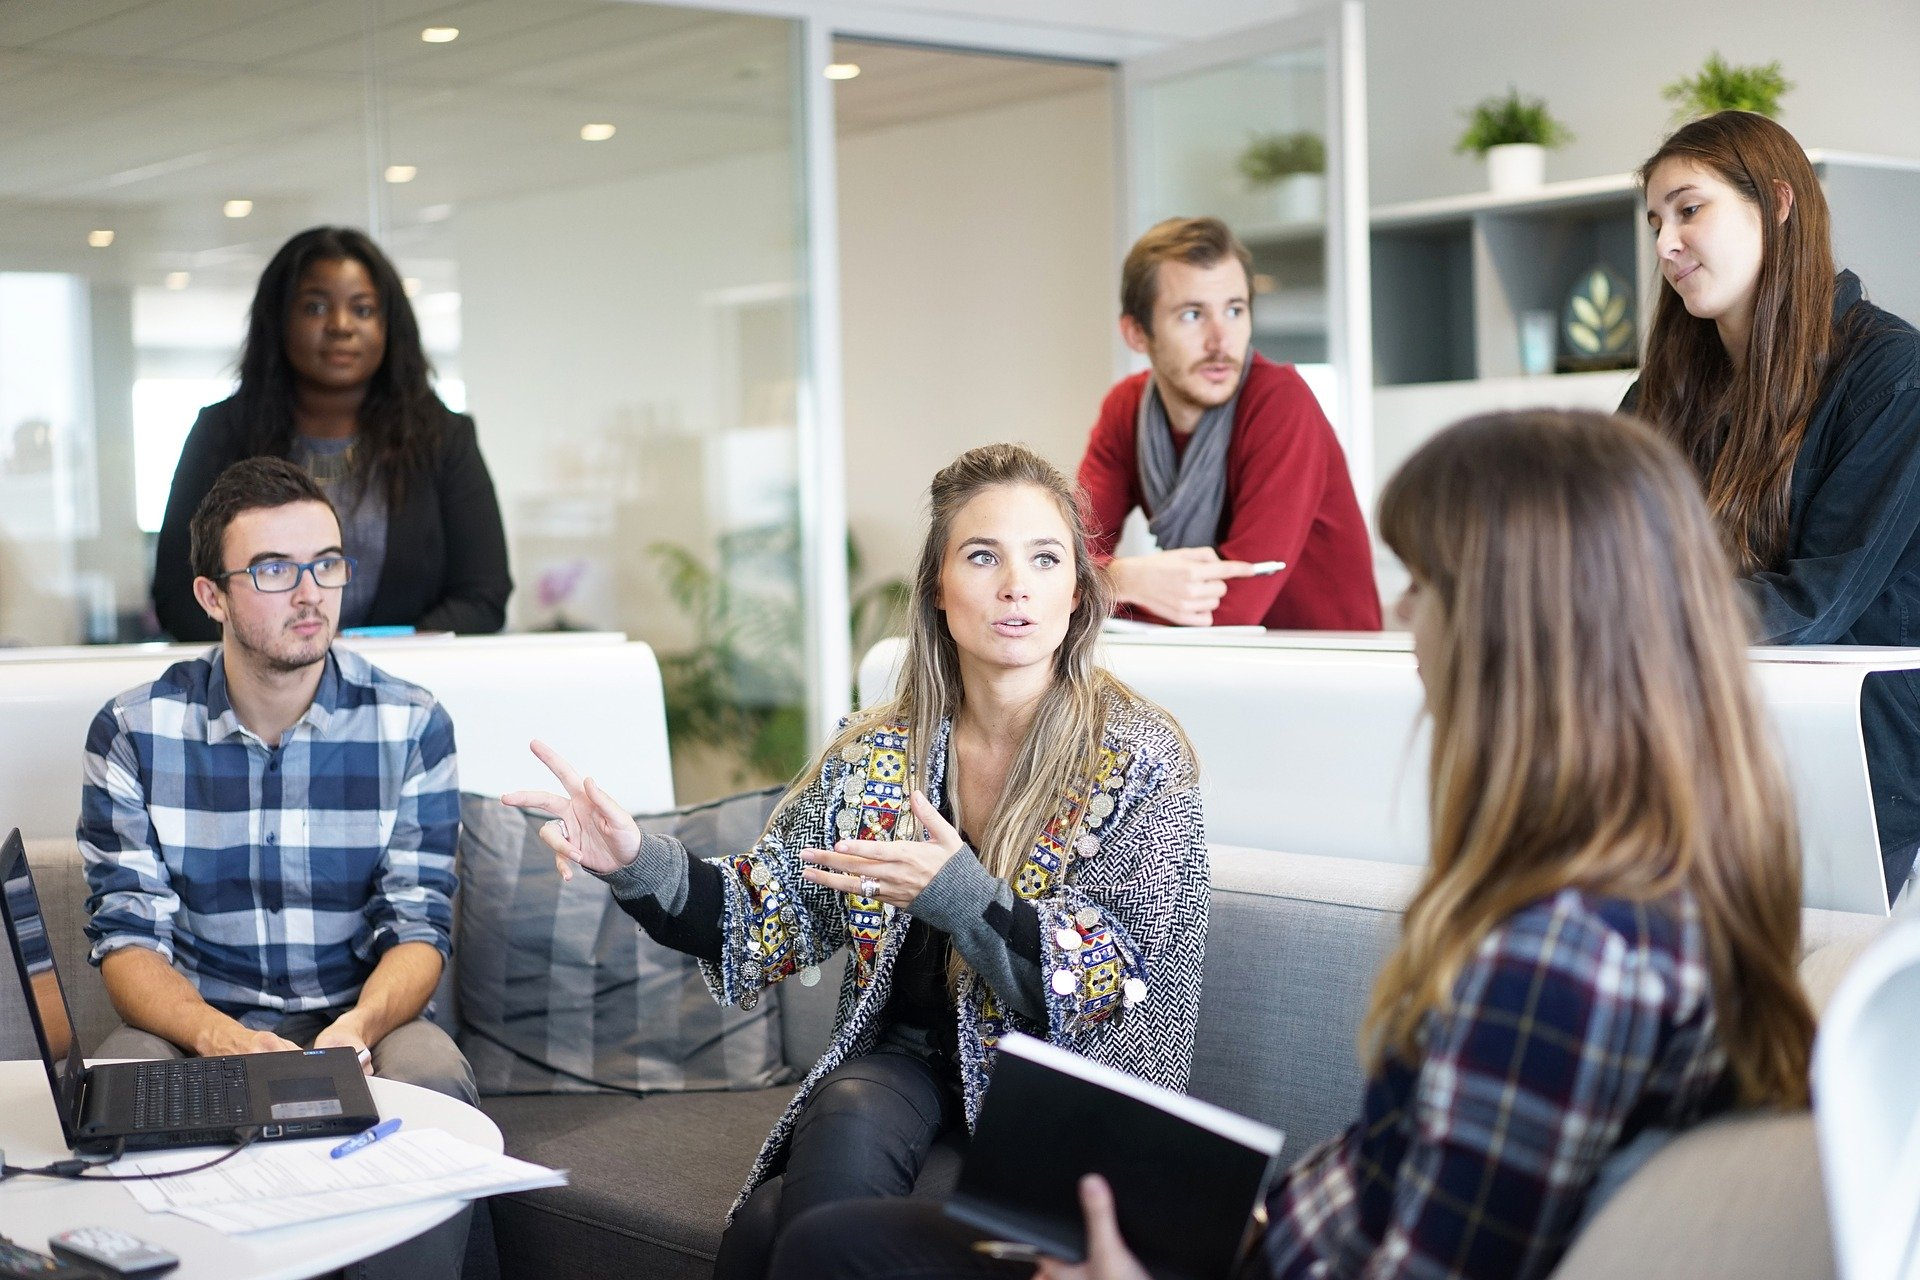

In [136]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

 Load Haar Cascade Pre-trained Model

In [137]:
# Load Haar cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

if face_cascade.empty():
    print("❌ Error: Haar cascade file not loaded correctly.")
else:
    print("✅ Haar cascade loaded successfully!")


✅ Haar cascade loaded successfully!


Haar Cascade works best on grayscale images. Ensure the conversion is correct:

In [138]:
height, width = image.shape[:2]
aspect_ratio = width / height  # Calculate aspect ratio
# Define new width or height while keeping aspect ratio
new_width = 600  # Example width
new_height = int(new_width / aspect_ratio)  # Maintain aspect ratio

# Resize without distortion
image_resized = cv2.resize(image, (new_width, new_height))

print("New shape:", image_resized.shape)


New shape: (400, 600, 3)


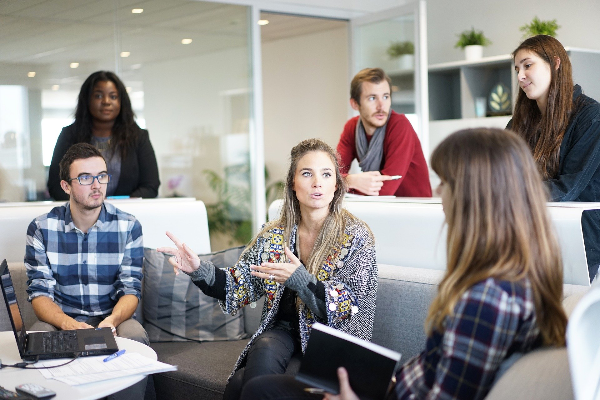

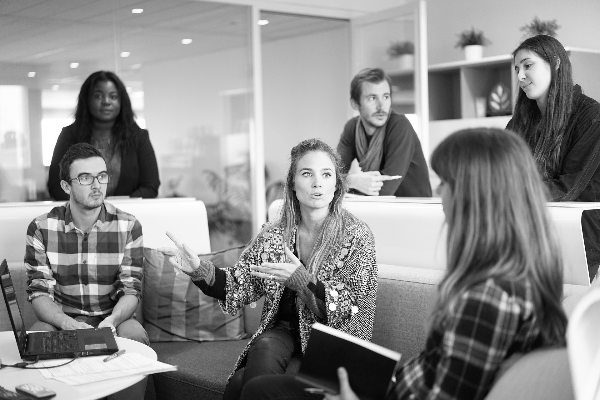

In [139]:
#converting into gray scale as th algorithm works well on grayscle
image_gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
cv2_imshow(image_resized)
cv2_imshow(image_gray)

In [143]:
faces = face_cascade.detectMultiScale(image_gray, scaleFactor=1.1, minNeighbors=5, minSize=(20, 20))
print(f"Found {len(faces)} faces")


Found 5 faces


36 36
50 50
43 43
49 49
57 57


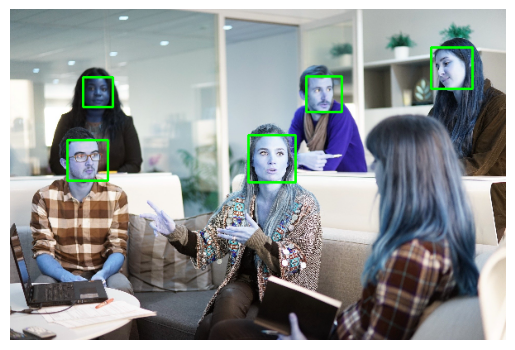

In [145]:
#Drwaing boxes around detectecd faces
for (x, y, w, h) in faces:
    cv2.rectangle(image_resized, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green rectangle
    print(w,h)

# Display the image with detected faces
plt.imshow(image_resized)
plt.axis("off")
plt.show()


## Resize Without Distortion Using Padding
since in upper resizing, model is able to detect only 3 faces instead of 4, trying new approach to resize photo

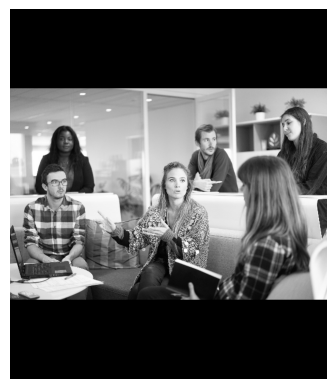

In [146]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/sample.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

desired_size = (600, 700)

# Compute the scale and new size while keeping aspect ratio
old_size = gray.shape[:2]
ratio = min(desired_size[0] / old_size[1], desired_size[1] / old_size[0])
new_size = (int(old_size[1] * ratio), int(old_size[0] * ratio))

# Resize without distortion
resized = cv2.resize(gray, new_size)

# Create a black canvas of the final desired size
final_image = np.zeros((desired_size[1], desired_size[0]), dtype=np.uint8)

# Compute top-left corner for centering
x_offset = (desired_size[0] - new_size[0]) // 2
y_offset = (desired_size[1] - new_size[1]) // 2

# Place resized image on black canvas
final_image[y_offset:y_offset + new_size[1], x_offset:x_offset + new_size[0]] = resized

plt.imshow(final_image, cmap='gray')
plt.axis("off")
plt.show()


In [147]:
faces = face_cascade.detectMultiScale(final_image, scaleFactor=1.5, minNeighbors=2, minSize=(15,5))
print(f"Found {len(faces)} faces")


Found 5 faces


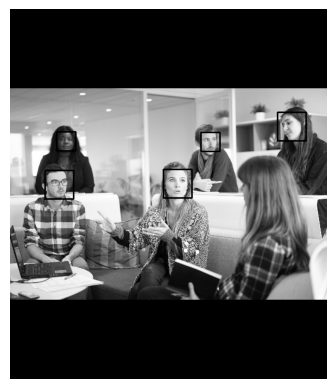

In [148]:
for (x, y, w, h) in faces:
    cv2.rectangle(final_image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green rectangle

# Convert BGR to RGB for correct visualization
image_rgb = cv2.cvtColor(final_image, cv2.COLOR_GRAY2RGB)

# Display the image with detected faces
plt.imshow(image_rgb)
plt.axis("off")
plt.show()


## EYE DETECTION

In [149]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [150]:
# Check if cascades are loaded properly
if eye_cascade.empty():
    print("❌ Error loading Haar cascades")
else:
    print("✅ Haar cascades loaded successfully!")


✅ Haar cascades loaded successfully!


In [152]:
# Load the image
image_path = '/content/sample.jpg'
image = cv2.imread(image_path)

# Check if the image is loaded
if image is None:
    print("❌ Error: Image not loaded. Check file path.")
else:
    print("✅ Image loaded successfully!")

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


✅ Image loaded successfully!


In [153]:
# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

print(f"Faces found: {len(faces)}")


Faces found: 6


In [156]:
# Draw rectangles around detected faces and eyes
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 3)  # Blue rectangle around face

    # Get the region of interest (ROI) for eyes
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]

    # Detect eyes inside the face ROI
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5, minSize=(20, 20))

    print(f"Eyes found: {len(eyes)} in face at {x, y}")

    # Draw rectangles around eyes
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)  # Green rectangle around eyes


Eyes found: 1 in face at (np.int32(1639), np.int32(159))
Eyes found: 2 in face at (np.int32(284), np.int32(263))
Eyes found: 2 in face at (np.int32(1148), np.int32(261))
Eyes found: 2 in face at (np.int32(229), np.int32(509))
Eyes found: 2 in face at (np.int32(928), np.int32(488))
Eyes found: 0 in face at (np.int32(103), np.int32(784))


Display the image with eye detected

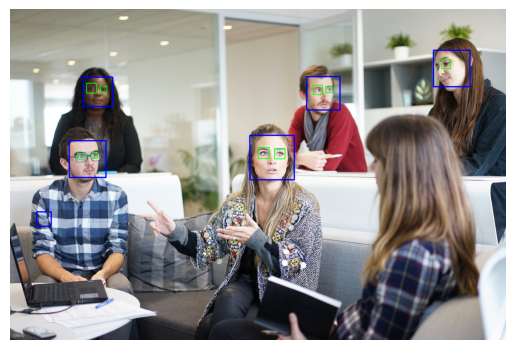

In [157]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


# Limitations of Haar Cascade
* ❌ Not robust to lighting changes → Works best in well-lit images.
* ❌ Struggles with occlusions → Faces partially covered by masks/glasses may not be detected.
* ❌ Not as accurate as deep learning models (e.g., CNNs, SSD, YOLO).

# Best Practices for Haar Cascade
* 🔹 Use grayscale images for better accuracy.
* 🔹 Tune scaleFactor, minNeighbors, and minSize for better results.
* 🔹 Consider deep learning alternatives (like dlib or OpenCV DNN) for better detection.